# Distribuição de Frequência no Python

Um professor coletou as notas de todos os alunos na avaliação final de um curso de matemática. O professor gostaria de tabular os dados a fim de extrair insights e compreender como os dados estão organizados. Crie um distribuição de frequência para ajudar o professor.

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Lista de notas de alunos na avaliação final do curso de Matemática
notas_alunos = [92, 81, 100, 92, 71, 73, 100, 92, 84, 100, 73, 92, 73, 84, 92, 92, 92, 84, 73, 100]

In [3]:
len(notas_alunos)

20

## Solução com Series em Pandas

In [4]:
# Série com notas e frequências
df1 = pd.Series(notas_alunos).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df1.columns = ['Nota', 'Frequencia']
print(df1)

   Nota  Frequencia
0    71           1
1    73           4
2    81           1
3    84           3
4    92           7
5   100           4


In [5]:
# Série com notas e frequências, alterando a quantidade de classes
df1 = pd.Series(notas_alunos).value_counts(bins=3).reset_index().sort_values('index').reset_index(drop=True)
df1.columns = ['Nota', 'Frequencia']
print(df1)

               Nota  Frequencia
0   (70.97, 80.667]           5
1  (80.667, 90.333]           4
2   (90.333, 100.0]          11


## Solução com Dataframes em Pandas

### Distribuição de Frequência Simples ou Absoluta - fi

São os valores que representam o número de dados de cada classe. A soma das frequências simples é igual ao número total de dados.

In [6]:
df2 = pd.value_counts(notas_alunos).to_frame(name='fi').rename_axis('Nota', axis=1).sort_index()
print(df2)

Nota  fi
71     1
73     4
81     1
84     3
92     7
100    4


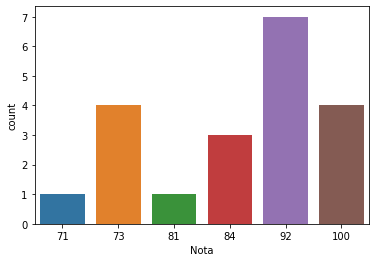

In [7]:

df = pd.DataFrame(notas_alunos)
df.columns = ['Nota']
graph1 = sns.countplot(x="Nota", data=df)

### Distribuição de Frequência Relativa Simples - fri

Permite visualizar os valores das razões entre Frequência Simples e a Frequência Total.

In [8]:
df2['fri'] = pd.value_counts(notas_alunos) / len(notas_alunos)
print(df2)

Nota  fi   fri
71     1  0.05
73     4  0.20
81     1  0.05
84     3  0.15
92     7  0.35
100    4  0.20


### Distribuição de Frequência Acumulada - Fi

Permite visualizar o total das Frequências de todos os valores inferiores ao limite superior do intervalo de uma dada classe

In [9]:
df2['Fi'] = df2.fi.cumsum()
print(df2)

Nota  fi   fri  Fi
71     1  0.05   1
73     4  0.20   5
81     1  0.05   6
84     3  0.15   9
92     7  0.35  16
100    4  0.20  20


### Distribuição de Frequência Relativa Acumulada - Fri

Permite visualizar a Frequência acumulada da classe, dividida pela Frequência total da distribuição

In [10]:
df2['Fri'] = df2.fi.cumsum() / len(notas_alunos)
print(df2)

Nota  fi   fri  Fi   Fri
71     1  0.05   1  0.05
73     4  0.20   5  0.25
81     1  0.05   6  0.30
84     3  0.15   9  0.45
92     7  0.35  16  0.80
100    4  0.20  20  1.00


# FIM